# CRIME RATES DATA ANALYTICS

## BUSINESS CASE : 

## DATASET : 

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Crime Analysis.csv")

In [3]:
df.head()

,YEAR,MONTH,DAY,DATE,COUNTRY,ATTACK TYPE,TARGET TYPE,Numkilled,Numwounded,Numprop,KILLED,WOUNDED,DAMAGE RATE
0,1992,1,1,1/1/1992,Israel,Assassination,Private Citizens & Property,1.0,0.0,0,0.00167,0.0,0.016667
1,1992,1,1,1/1/1992,El Salvador,Bombing/Explosion,Journalists & Media,0.0,0.0,1,0.00000,0.0,0.016667
2,1992,1,1,1/1/1992,United Kingdom,Facility/Infrastructure Attack,Business,0.0,0.0,1,0.00000,0.0,0.016667
3,1992,1,1,1/1/1992,United Kingdom,Facility/Infrastructure Attack,Business,0.0,0.0,1,0.00000,0.0,0.016667
4,1992,1,1,1/1/1992,United Kingdom,Facility/Infrastructure Attack,Business,0.0,0.0,1,0.00000,0.0,0.016667


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92392 entries, 0 to 92391
Data columns (total 13 columns):
YEAR           92392 non-null int64
MONTH          92392 non-null int64
DAY            92392 non-null int64
DATE           92392 non-null object
COUNTRY        92392 non-null object
ATTACK TYPE    92392 non-null object
TARGET TYPE    92392 non-null object
Numkilled      90024 non-null float64
Numwounded     87256 non-null float64
Numprop        92392 non-null int64
KILLED         92392 non-null float64
WOUNDED        92392 non-null float64
DAMAGE RATE    92392 non-null float64
dtypes: float64(5), int64(4), object(4)
memory usage: 9.2+ MB


DataFrame.describe() method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. This method tells us a lot of things about a dataset. One important thing is that the describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns unless parameter include="all" is passed.

Count tells us the number of NoN-empty rows in a feature.
Mean tells us the mean value of that feature.
Std tells us the Standard Deviation Value of that feature.
Min tells us the minimum value of that feature.
25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
Max tells us the maximum value of that feature.

In [5]:
df.describe()

,YEAR,MONTH,DAY,Numkilled,Numwounded,Numprop,KILLED,WOUNDED,DAMAGE RATE
count,92392.000000,92392.000000,92392.000000,90024.000000,87256.000000,92392.000000,92392.000000,92392.000000,92392.000000
mean,2006.909981,6.535685,15.462594,2.433662,3.734707,-0.882176,0.003953,0.005878,0.083603
std,7.262959,3.383198,8.802134,12.875217,27.794233,3.457721,0.021192,0.045040,0.534260
min,1992.000000,1.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,-0.150000
25%,2001.000000,4.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016667
50%,2010.000000,7.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.016667
75%,2013.000000,9.000000,23.000000,2.000000,2.000000,1.000000,0.003330,0.003333,0.066667
max,2014.000000,12.000000,31.000000,1500.000000,5500.000000,1.000000,2.500000,9.166667,91.900000


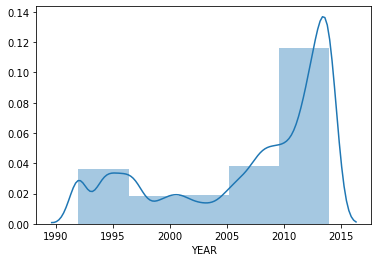

In [6]:
sns.distplot(df['YEAR'], bins = 5)

In [7]:
print(df.isnull().sum())

YEAR              0
MONTH             0
DAY               0
DATE              0
COUNTRY           0
ATTACK TYPE       0
TARGET TYPE       0
Numkilled      2368
Numwounded     5136
Numprop           0
KILLED            0
WOUNDED           0
DAMAGE RATE       0
dtype: int64


# Aiming to impute nan values for the columns in accordance with their distribution

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


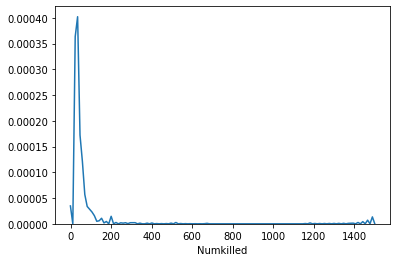

In [8]:
sns.distplot(df['Numkilled'], bins =1, hist = False )

In [9]:
df['Numkilled'].median()

1.0

In [10]:
df['Numkilled'].fillna(df['Numkilled'].median(), inplace = True)

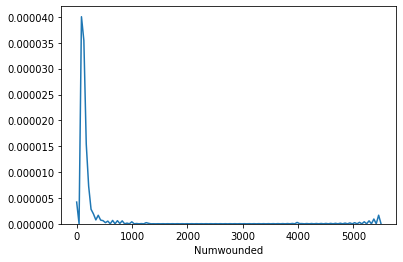

In [11]:
sns.distplot(df['Numwounded'], bins =1, hist = False )

In [12]:
df['Numwounded'].median()

0.0

In [13]:
df['Numwounded'].fillna(df['Numwounded'].median(), inplace = True)

## Plotting after Nan removal 

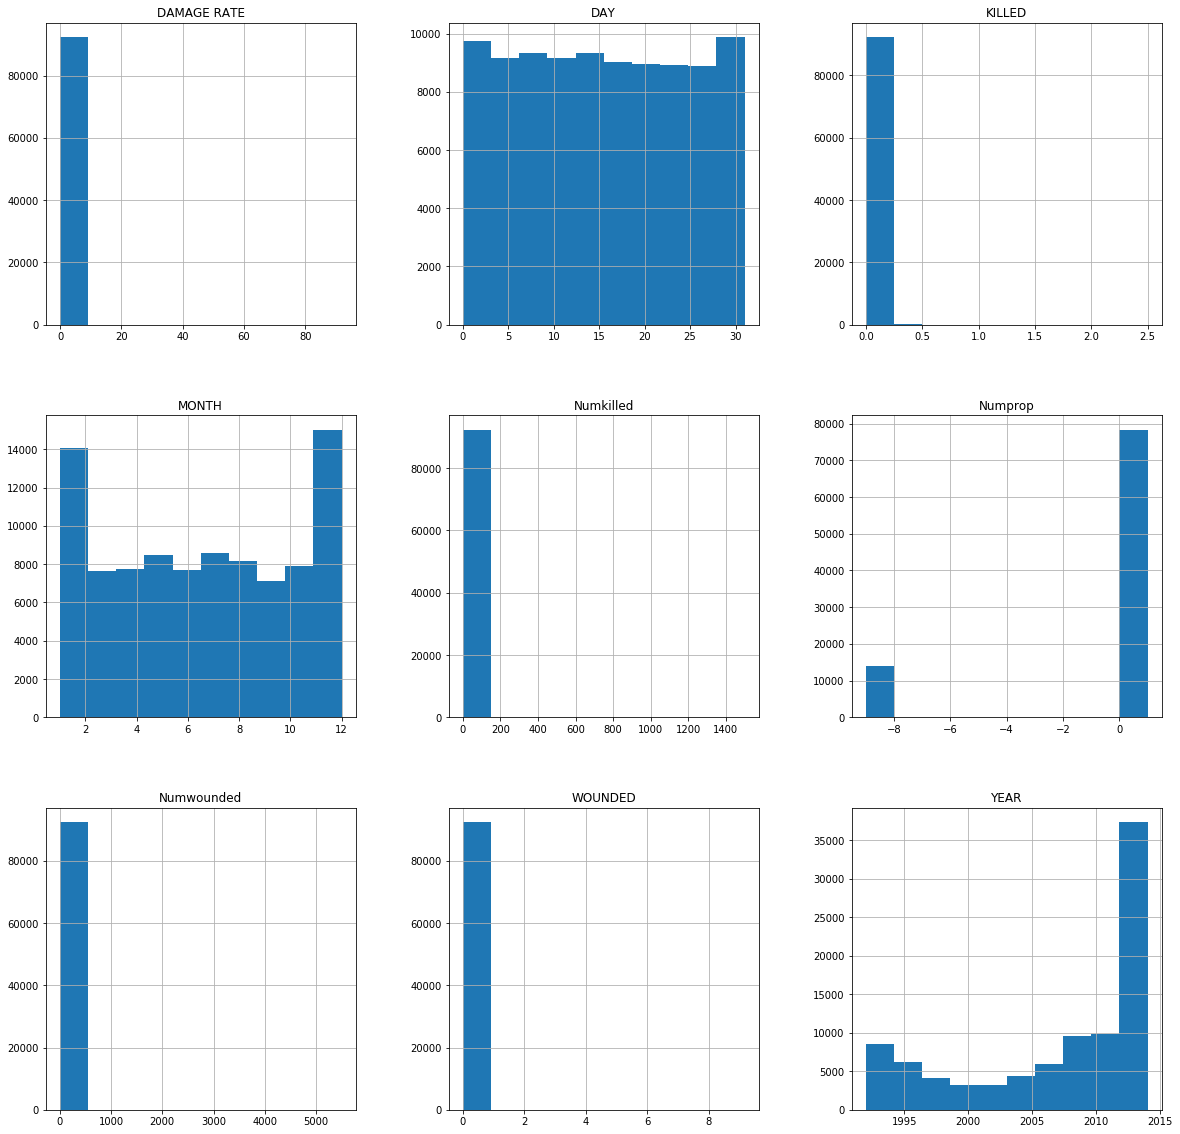

In [14]:
p = df.hist(figsize = (20,20))

# Date Time Method: DayName
That method will give us the weekday that this date fell on datetime data. We need to figure out how our date is formatted and tell pandas how to parse date. In that data, date starts with year, following by month than day. 
Link: https://docs.python.org/3/library/datetime.html

In [15]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [16]:
df

,YEAR,MONTH,DAY,DATE,COUNTRY,ATTACK TYPE,TARGET TYPE,Numkilled,Numwounded,Numprop,KILLED,WOUNDED,DAMAGE RATE
0,1992,1,1,1992-01-01,Israel,Assassination,Private Citizens & Property,1.0,0.0,0,0.00167,0.000000,0.016667
1,1992,1,1,1992-01-01,El Salvador,Bombing/Explosion,Journalists & Media,0.0,0.0,1,0.00000,0.000000,0.016667
2,1992,1,1,1992-01-01,United Kingdom,Facility/Infrastructure Attack,Business,0.0,0.0,1,0.00000,0.000000,0.016667
3,1992,1,1,1992-01-01,United Kingdom,Facility/Infrastructure Attack,Business,0.0,0.0,1,0.00000,0.000000,0.016667
4,1992,1,1,1992-01-01,United Kingdom,Facility/Infrastructure Attack,Business,0.0,0.0,1,0.00000,0.000000,0.016667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92387,2014,12,31,2014-12-31,Algeria,Bombing/Explosion,Unknown,0.0,0.0,0,0.00000,0.000000,0.000000
92388,2014,12,31,2014-12-31,Indonesia,Hostage Taking (Kidnapping),Private Citizens & Property,1.0,0.0,0,0.00167,0.000000,0.016667
92389,2014,12,27,2014-12-27,Afghanistan,Bombing/Explosion,Private Citizens & Property,5.0,0.0,0,0.00833,0.000000,0.083333
92390,2014,12,31,2014-12-31,Philippines,Bombing/Explosion,Private Citizens & Property,2.0,32.0,1,0.00333,0.053333,0.583333


Series.dt can be used to access the values of the series as datetimelike and return several properties. Pandas Series.dt.day attribute return a numpy array containing the day of the datetime in the underlying data of the given series object.

In [17]:
df['DayOfWeek'] = df['DATE'].dt.day_name()
df

,YEAR,MONTH,DAY,DATE,COUNTRY,ATTACK TYPE,TARGET TYPE,Numkilled,Numwounded,Numprop,KILLED,WOUNDED,DAMAGE RATE,DayOfWeek
0,1992,1,1,1992-01-01,Israel,Assassination,Private Citizens & Property,1.0,0.0,0,0.00167,0.000000,0.016667,Wednesday
1,1992,1,1,1992-01-01,El Salvador,Bombing/Explosion,Journalists & Media,0.0,0.0,1,0.00000,0.000000,0.016667,Wednesday
2,1992,1,1,1992-01-01,United Kingdom,Facility/Infrastructure Attack,Business,0.0,0.0,1,0.00000,0.000000,0.016667,Wednesday
3,1992,1,1,1992-01-01,United Kingdom,Facility/Infrastructure Attack,Business,0.0,0.0,1,0.00000,0.000000,0.016667,Wednesday
4,1992,1,1,1992-01-01,United Kingdom,Facility/Infrastructure Attack,Business,0.0,0.0,1,0.00000,0.000000,0.016667,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92387,2014,12,31,2014-12-31,Algeria,Bombing/Explosion,Unknown,0.0,0.0,0,0.00000,0.000000,0.000000,Wednesday
92388,2014,12,31,2014-12-31,Indonesia,Hostage Taking (Kidnapping),Private Citizens & Property,1.0,0.0,0,0.00167,0.000000,0.016667,Wednesday
92389,2014,12,27,2014-12-27,Afghanistan,Bombing/Explosion,Private Citizens & Property,5.0,0.0,0,0.00833,0.000000,0.083333,Saturday
92390,2014,12,31,2014-12-31,Philippines,Bombing/Explosion,Private Citizens & Property,2.0,32.0,1,0.00333,0.053333,0.583333,Wednesday


## Create a Filter for the last 10 years:

In [18]:
filt = (df['DATE'] >= '2010')
df.loc[filt] 

,YEAR,MONTH,DAY,DATE,COUNTRY,ATTACK TYPE,TARGET TYPE,Numkilled,Numwounded,Numprop,KILLED,WOUNDED,DAMAGE RATE,DayOfWeek
45199,2010,1,1,2010-01-01,Afghanistan,Bombing/Explosion,Private Citizens & Property,4.0,0.0,1,0.00667,0.000000,0.083333,Friday
45200,2010,1,1,2010-01-01,Pakistan,Bombing/Explosion,Private Citizens & Property,0.0,0.0,1,0.00000,0.000000,0.016667,Friday
45201,2010,1,1,2010-01-01,Pakistan,Bombing/Explosion,Private Citizens & Property,0.0,0.0,0,0.00000,0.000000,0.000000,Friday
45202,2010,1,1,2010-01-01,Pakistan,Bombing/Explosion,Educational Institution,0.0,0.0,1,0.00000,0.000000,0.016667,Friday
45203,2010,1,1,2010-01-01,Pakistan,Bombing/Explosion,Educational Institution,0.0,0.0,1,0.00000,0.000000,0.016667,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92387,2014,12,31,2014-12-31,Algeria,Bombing/Explosion,Unknown,0.0,0.0,0,0.00000,0.000000,0.000000,Wednesday
92388,2014,12,31,2014-12-31,Indonesia,Hostage Taking (Kidnapping),Private Citizens & Property,1.0,0.0,0,0.00167,0.000000,0.016667,Wednesday
92389,2014,12,27,2014-12-27,Afghanistan,Bombing/Explosion,Private Citizens & Property,5.0,0.0,0,0.00833,0.000000,0.083333,Saturday
92390,2014,12,31,2014-12-31,Philippines,Bombing/Explosion,Private Citizens & Property,2.0,32.0,1,0.00333,0.053333,0.583333,Wednesday


## Date as the Index

In [19]:
df.set_index('DATE', inplace=True)

In [20]:
df.head()

,YEAR,MONTH,DAY,COUNTRY,ATTACK TYPE,TARGET TYPE,Numkilled,Numwounded,Numprop,KILLED,WOUNDED,DAMAGE RATE,DayOfWeek
DATE,,,,,,,,,,,,,
1992-01-01,1992,1,1,Israel,Assassination,Private Citizens & Property,1.0,0.0,0,0.00167,0.0,0.016667,Wednesday
1992-01-01,1992,1,1,El Salvador,Bombing/Explosion,Journalists & Media,0.0,0.0,1,0.00000,0.0,0.016667,Wednesday
1992-01-01,1992,1,1,United Kingdom,Facility/Infrastructure Attack,Business,0.0,0.0,1,0.00000,0.0,0.016667,Wednesday
1992-01-01,1992,1,1,United Kingdom,Facility/Infrastructure Attack,Business,0.0,0.0,1,0.00000,0.0,0.016667,Wednesday
1992-01-01,1992,1,1,United Kingdom,Facility/Infrastructure Attack,Business,0.0,0.0,1,0.00000,0.0,0.016667,Wednesday


### Daily Number of Killed for the Last 10 Years :

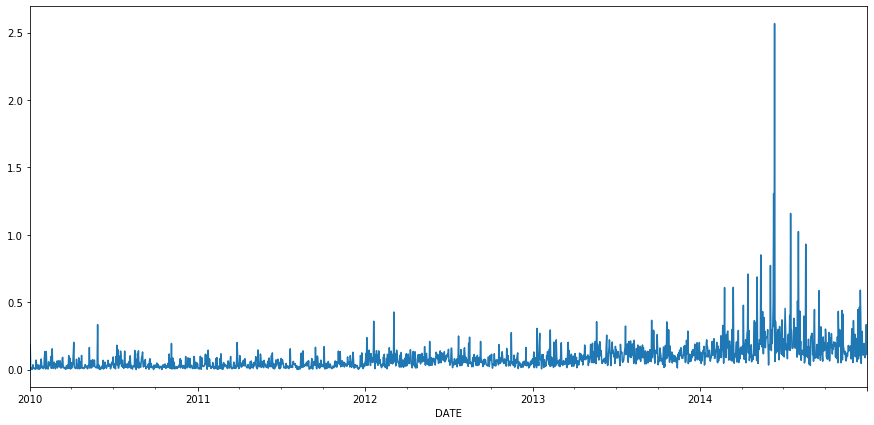

In [25]:
d_killed = df['KILLED'].resample('d').sum() # Daily sum values at 2020.
d_killed['2010-01-01' : '2020-01-01'].plot(figsize = (15,7))

### Daily Number of Wounded for the Last 10 Years :

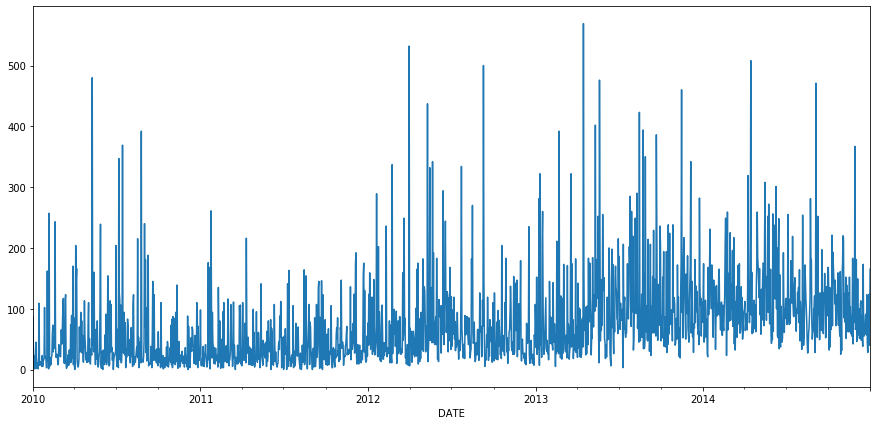

In [28]:
d_wounded = df['Numwounded'].resample('d').sum() # Daily sum values at 2020.
d_wounded['2010-01-01' : '2020-01-01'].plot(figsize = (15,7))

### Daily Average Damage Rate for the Last 10 Years :

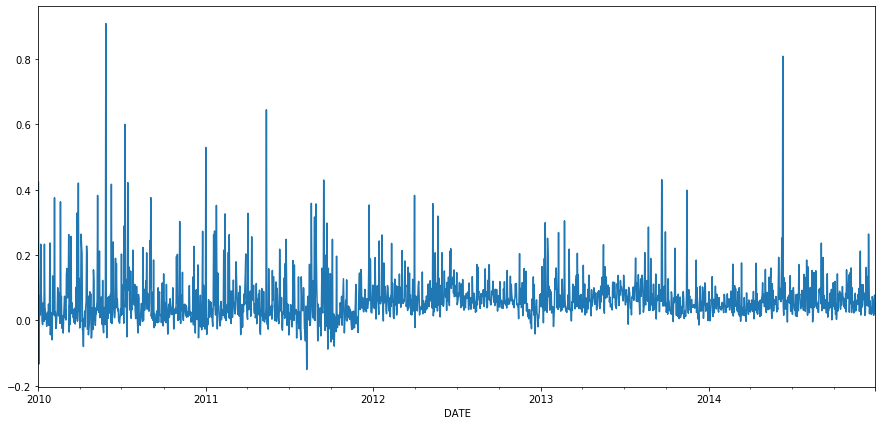

In [30]:
d_drate = df['DAMAGE RATE'].resample('d').mean() # Daily sum values at 2020.
d_drate['2010-01-01' : '2020-01-01'].plot(figsize = (15,7))

In [24]:
## observing the shape of the data
print('df Shape: {}'.format(df.shape))

df Shape: (92392, 13)


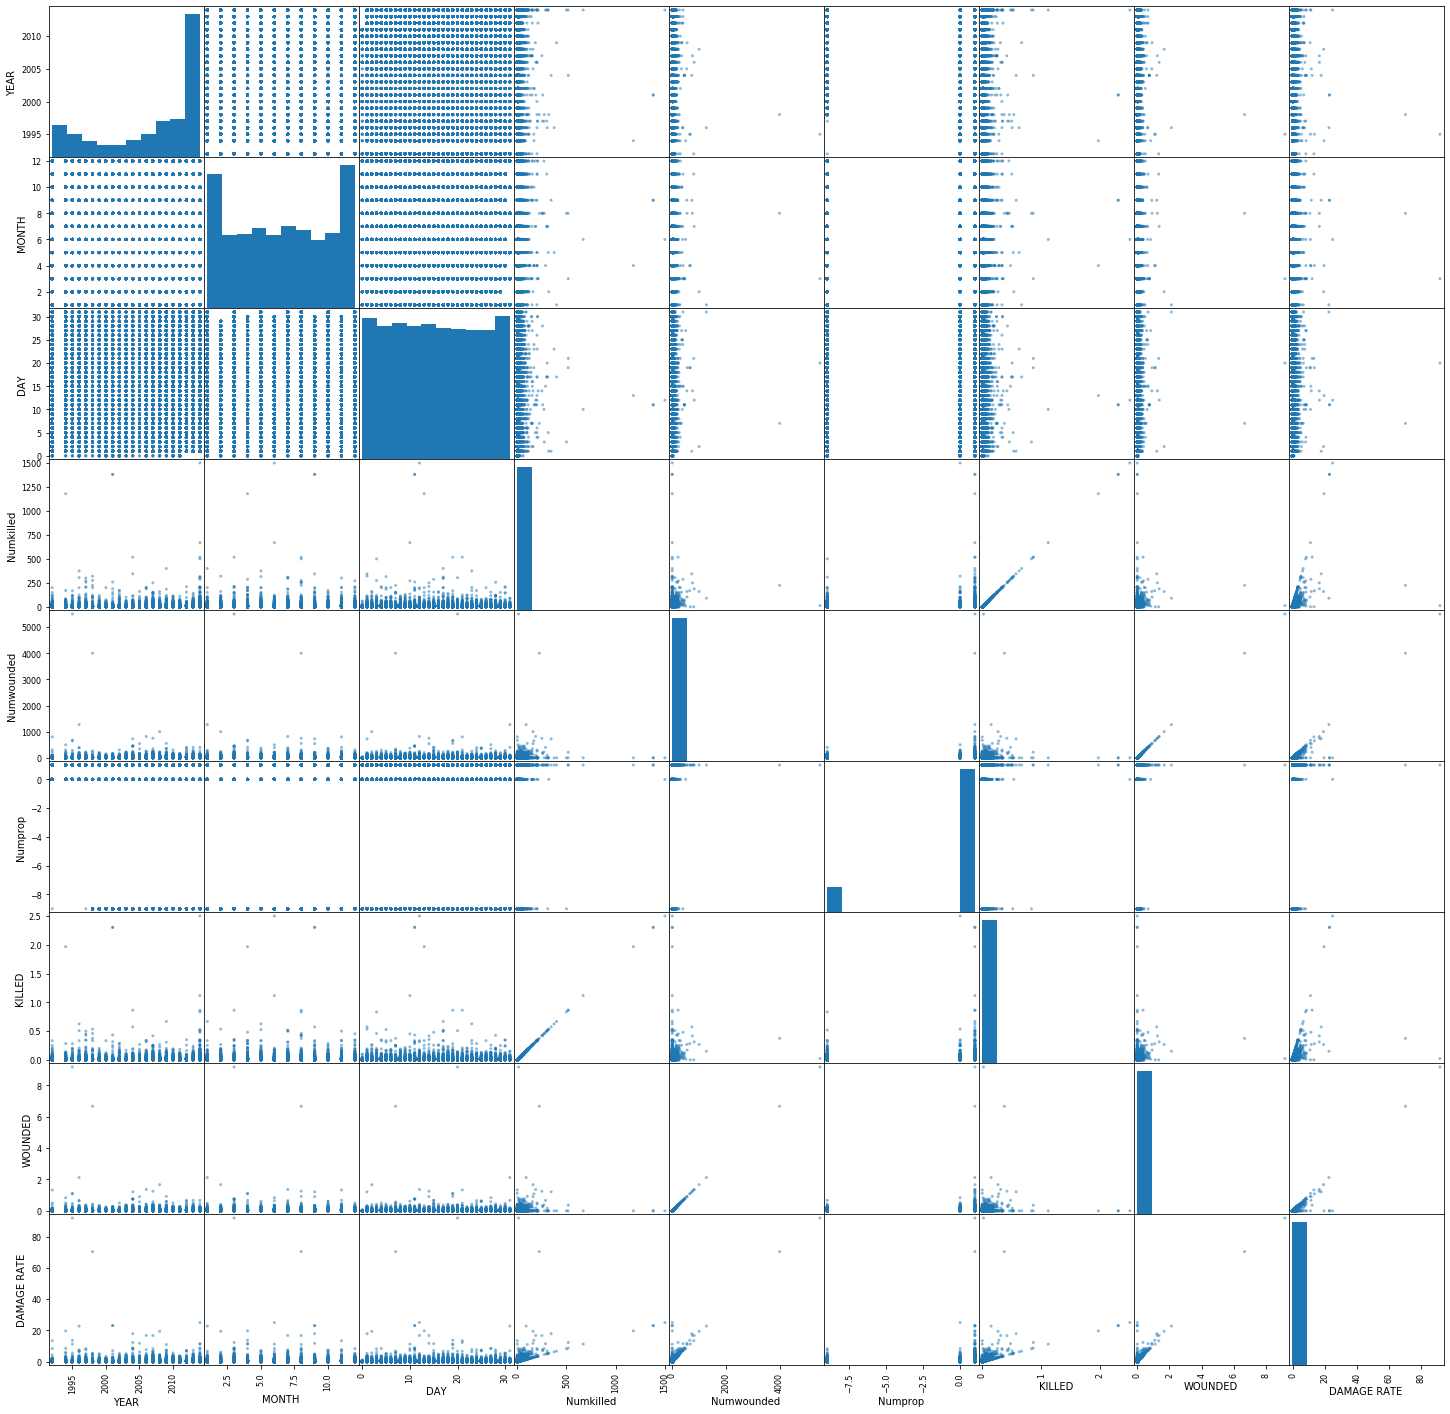

In [46]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(df,figsize=(25, 25))

The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

#### Pair plot for clean data

In [ ]:
p=sns.pairplot(df, hue = 'ATTACK TYPE')

***Pearson's Correlation Coefficient***: helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

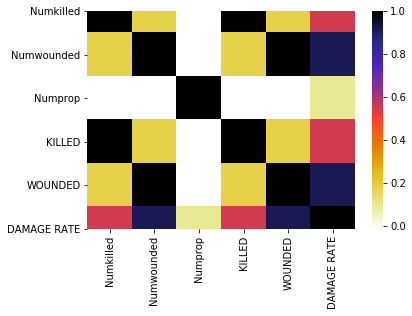

In [105]:
sns.heatmap(df.drop(['YEAR','MONTH','DAY'], axis  = 1).corr(), cmap='CMRmap_r')

In [54]:
df['ATTACK TYPE'].nunique()
df['ATTACK TYPE'].unique()

array(['Assassination', 'Bombing/Explosion',
       'Facility/Infrastructure Attack', 'Armed Assault', 'Unknown',
       'Unarmed Assault', 'Hostage Taking (Kidnapping)',
       'Hostage Taking (Barricade Incident)', 'Hijacking'], dtype=object)

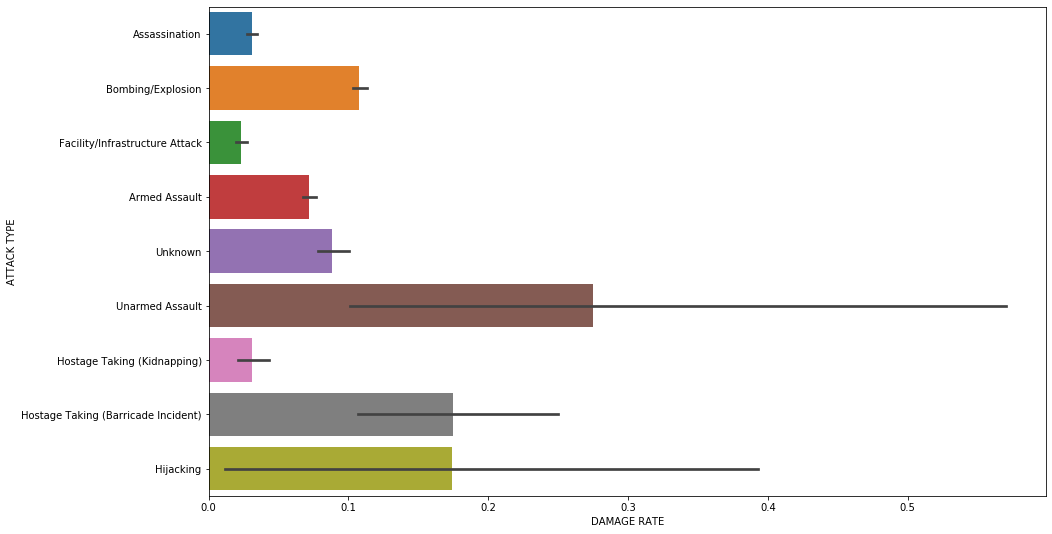

In [141]:
plt.figure(figsize=(15,9))
sns.barplot(y = 'ATTACK TYPE', x = 'DAMAGE RATE', data=df)

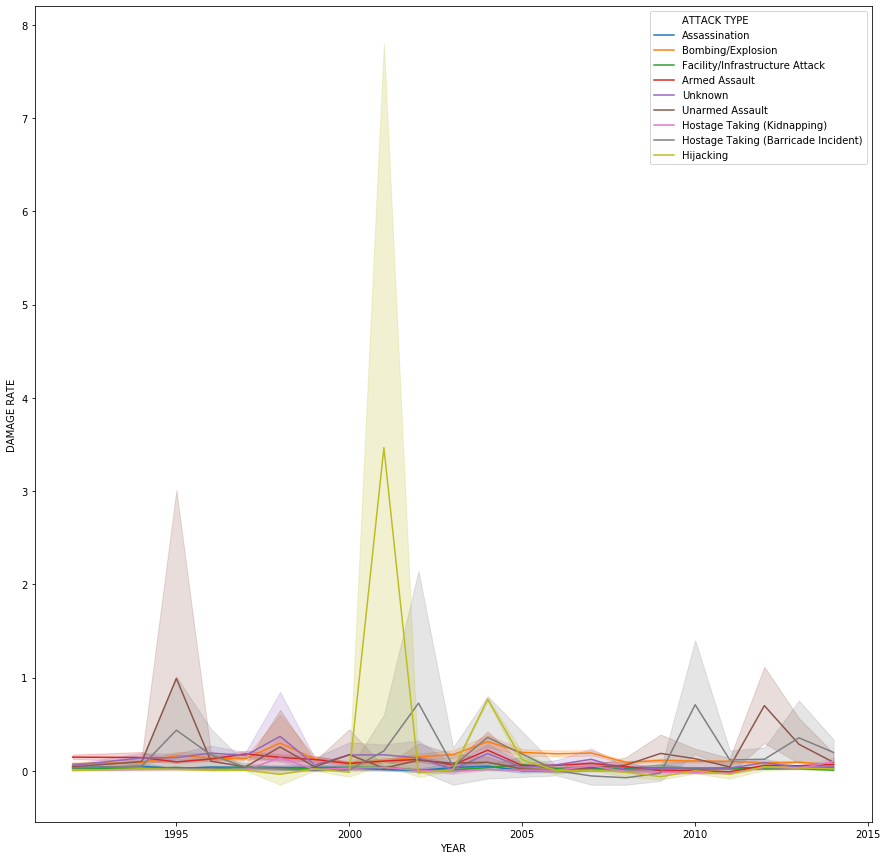

In [121]:
plt.figure(figsize=(15,15))
sns.lineplot(x='YEAR', y="DAMAGE RATE",
                  hue="ATTACK TYPE",
                  data=df)

In [140]:
df['TARGET TYPE'].nunique()
df['TARGET TYPE'].unique()

array(['Private Citizens & Property', 'Journalists & Media', 'Business',
       'Government (General)', 'Educational Institution', 'Police',
       'Transportation', 'Government (Diplomatic)', 'Tourists',
       'Military', 'Terrorists/Non-State Militia',
       'Religious Figures/Institutions', 'Utilities', 'Maritime',
       'Abortion Related', 'NGO', 'Violent Political Party',
       'Airports & Aircraft', 'Unknown', 'Telecommunication',
       'Food or Water Supply', 'Other'], dtype=object)

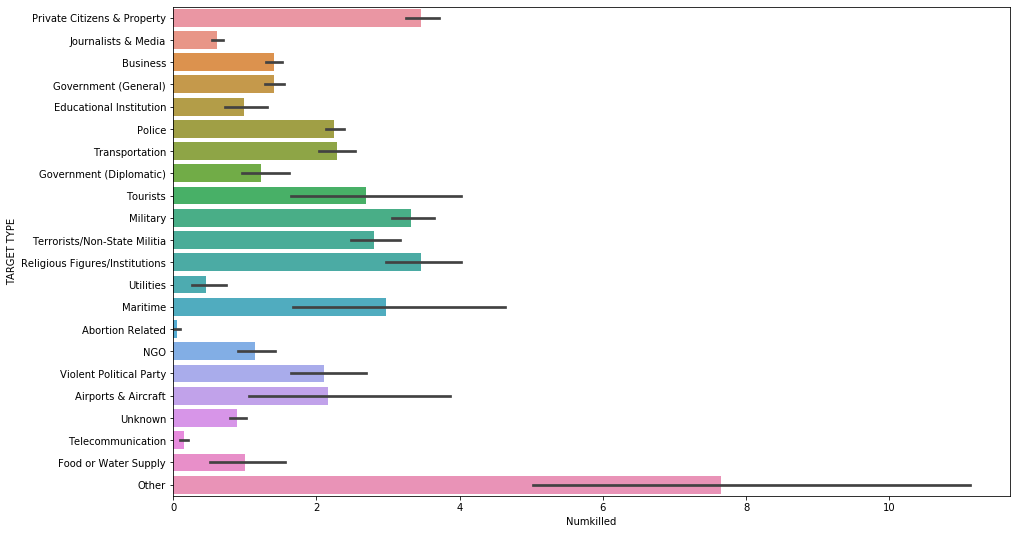

In [142]:
plt.figure(figsize=(15,9))
sns.barplot(y = 'TARGET TYPE', x = 'Numkilled', data=df)

## Scaling the Data 

In [122]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [124]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'COUNTRY', 'ATTACK TYPE', 'TARGET TYPE',
       'Numkilled', 'Numwounded', 'Numprop', 'KILLED', 'WOUNDED',
       'DAMAGE RATE', 'DayOfWeek'],
      dtype='object')

In [127]:
X = pd.DataFrame(df.drop(('DAMAGE RATE'), axis = 1))

In [133]:
y = pd.DataFrame(df['DAMAGE RATE'])

In [134]:
print('Shape of X: ', X.shape)
print('Shape of y: ', y.shape)

Shape of X:  (92392, 12)
Shape of y:  (92392, 1)


In [135]:
X.head()

,YEAR,MONTH,DAY,COUNTRY,ATTACK TYPE,TARGET TYPE,Numkilled,Numwounded,Numprop,KILLED,WOUNDED,DayOfWeek
DATE,,,,,,,,,,,,
1992-01-01,1992,1,1,Israel,Assassination,Private Citizens & Property,1.0,0.0,0,0.00167,0.0,Wednesday
1992-01-01,1992,1,1,El Salvador,Bombing/Explosion,Journalists & Media,0.0,0.0,1,0.00000,0.0,Wednesday
1992-01-01,1992,1,1,United Kingdom,Facility/Infrastructure Attack,Business,0.0,0.0,1,0.00000,0.0,Wednesday
1992-01-01,1992,1,1,United Kingdom,Facility/Infrastructure Attack,Business,0.0,0.0,1,0.00000,0.0,Wednesday
1992-01-01,1992,1,1,United Kingdom,Facility/Infrastructure Attack,Business,0.0,0.0,1,0.00000,0.0,Wednesday


## TRAIN TEST SPLIT

In [137]:
#importing train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)